## I. Classification

## 1. k-Nearest Neighbors

Load dataset, using the following code:

In [2]:
#import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
#load the digits dataset: digits
digits = datasets.load_digits()

Before applying the classifier, we need to split dataset:

In [3]:
from sklearn.model_selection import train_test_split
import numpy as np
#create feature and target arrays
X = digits.data
y = digits.target
#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42, stratify=y)

In [4]:
X_train

array([[ 0.,  0., 11., ...,  2.,  0.,  0.],
       [ 0.,  0.,  2., ...,  1.,  0.,  0.],
       [ 0.,  1., 15., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  3., ..., 16., 16.,  3.]])

In [5]:
X_test

array([[ 0.,  0.,  8., ...,  4.,  0.,  0.],
       [ 0.,  3., 16., ...,  8.,  3.,  0.],
       [ 0.,  0.,  2., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0., 10., ...,  3.,  0.,  0.],
       [ 0.,  0.,  7., ..., 12.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.]])

In [6]:
y_train

array([5, 0, 5, ..., 9, 7, 9])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
#
train_score = []
test_score = []
x_cor = [i for i in range(1,9)]
for i in range(1,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    #fit the classifier to the training data
    knn.fit(X_train, y_train)
    #print the accuracy
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [8]:
x_cor

[1, 2, 3, 4, 5, 6, 7, 8]

In [9]:
train_score

[1.0,
 0.9916492693110647,
 0.9937369519832986,
 0.9937369519832986,
 0.9916492693110647,
 0.9895615866388309,
 0.9902574808629089,
 0.9895615866388309]

In [10]:
test_score

[0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112,
 0.9833333333333333,
 0.9833333333333333,
 0.9805555555555555,
 0.9833333333333333,
 0.9777777777777777]

Text(0, 0.5, 'Accuracy')

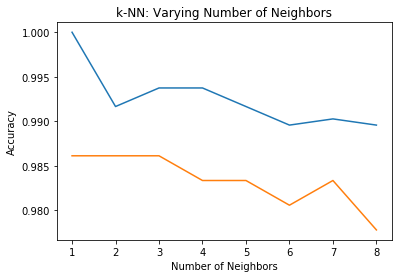

In [11]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(x_cor,train_score, label='Training Accuracy')
plt.plot(x_cor, test_score, label='Testing Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

k = 2 is the best because the difference between Testing Accuracy and Training Accuracy is smallest

In [12]:
knn_accuracy = test_score[1]

## 2. Support Vector Machine

Implement SVM classifier for MNIST dataset

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
from sklearn.svm import SVC
list_kernel = ['linear', 'poly', 'rbf']
svm_accuracy = 0
for k in list_kernel:    
    svclassifier = SVC(kernel=k, gamma='auto')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    print('Kernel = ', k)
    print(classification_report(y_test,y_pred),'\n')
    if accuracy_score(y_test, y_pred) > svm_accuracy:
        svm_accuracy = accuracy_score(y_test, y_pred)

Kernel =  linear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.94      0.93        36
           2       1.00      1.00      1.00        35
           3       1.00      0.97      0.99        37
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.94      0.89      0.91        35
           9       0.95      1.00      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360
 

Kernel =  poly
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00 

Conclusion: polynomial kernel should be used in this case

In [15]:
svm_accuracy

0.9861111111111112

## 3. Naïve Bayes

Compute the accuracy scores and plot the confusion matrix of the same dataset using
Naïve Bayes classifier. Hint: from sklearn.metrics import confusion_matrix

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
y_predict = gnb.predict(X_test)

In [18]:
gnb_score = accuracy_score(y_test, y_predict)
gnb_score

0.8111111111111111

In [19]:
cfs_matrix = confusion_matrix(y_test,y_predict)
cfs_matrix

array([[33,  0,  0,  0,  1,  1,  0,  0,  1,  0],
       [ 0, 29,  1,  0,  0,  0,  1,  0,  3,  2],
       [ 0,  3, 19,  0,  0,  0,  0,  0, 13,  0],
       [ 0,  0,  1, 26,  0,  0,  0,  1,  8,  1],
       [ 0,  2,  0,  0, 26,  0,  1,  6,  1,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 35,  0,  0],
       [ 0,  4,  1,  0,  0,  0,  0,  1, 29,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  4,  3, 25]])

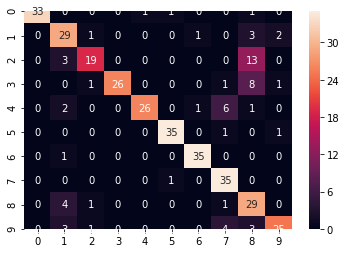

In [20]:
# plt.figure(figsize = (10,7))
sn.heatmap(cfs_matrix, annot=True)

In [21]:
alg_accuracy = [gnb_score, knn_accuracy, svm_accuracy]
alg_accuracy

[0.8111111111111111, 0.9861111111111112, 0.9861111111111112]

Compare the accuracy of different classifiers in the same plot.

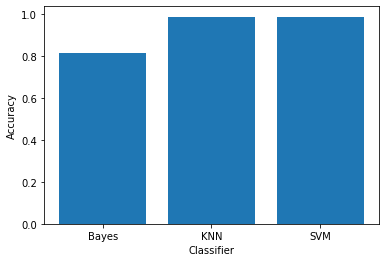

In [22]:
alg_type = ['Bayes', 'KNN', 'SVM']
plt.bar(alg_type, alg_accuracy)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

## II. Regression

## 1. Linear Regression

load data

In [23]:
import pandas as pd
import seaborn as sn
df = pd.read_csv('gapminder.csv')
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


Use seaborn to visualize the data of Gapminder like following image:

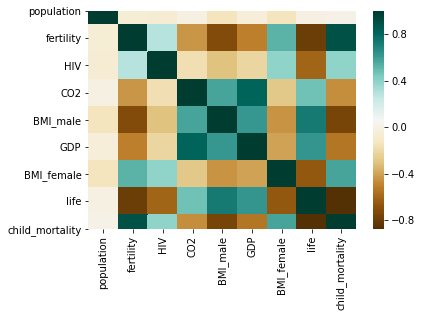

In [24]:
sn.heatmap(df.corr(), cmap='BrBG')

Apply linear regression with the 'fertility' feature to predict life expectancy.

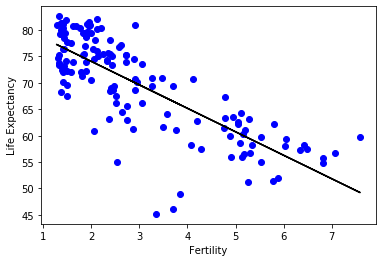

In [25]:
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

LR = LinearRegression()
lrX = df['fertility'].values.reshape(-1,1)
lrY = df['life'].values.reshape(-1,1)
LR.fit(lrX, lrY)
lrY_pred = LR.predict(lrX)
plt.scatter (lrX, lrY, c = 'blue')
plt.plot (lrX, lrY_pred, color = 'black')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()

Apply linear regression with the all features to predict life expectancy. Compare the
model score when using all features to one feature in previous step.

In [26]:
new_df = pd.get_dummies(df)
new_df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,0,0,0,1,0,0
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,0,0,0,0,0,1
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,1,0,0,0,0,0
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,0,0,1,0,0,0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3350832,2.11,0.5,2.489764,26.39123,15317,124.2604,76.0,13.0,1,0,0,0,0,0
135,26952719,2.46,0.1,4.476669,25.32054,3733,124.3462,68.7,49.2,0,0,1,0,0,0
136,86589342,1.86,0.4,1.479347,20.91630,4085,121.9367,75.4,26.2,0,1,0,0,0,0
137,13114579,5.88,13.6,0.148982,20.68321,3039,132.4493,52.0,94.9,0,0,0,0,0,1


In [109]:
features = [x for x in list(new_df.columns) if x != 'life' and x!='Region']
features

['population',
 'fertility',
 'HIV',
 'CO2',
 'BMI_male',
 'GDP',
 'BMI_female',
 'child_mortality',
 'Region_America',
 'Region_East Asia & Pacific',
 'Region_Europe & Central Asia',
 'Region_Middle East & North Africa',
 'Region_South Asia',
 'Region_Sub-Saharan Africa']

In [110]:
lrX_all = new_df[features]

In [111]:
LR.fit(lrX_all, df['life'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
lrY_all_predict = LR.predict(lrX_all)

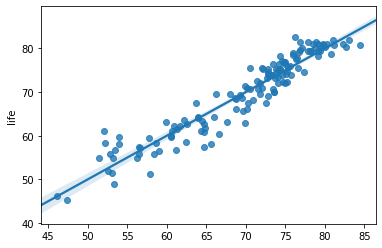

In [117]:
sn.regplot(lrY_all_predict, df['life'])

Apply 5-fold cross-validation (for both 2 above steps) and compare your model score
accuracy

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
score_ferility = cross_val_score(LR, lrX, lrY, cv=5) 
score_ferility

array([0.71001079, 0.75007717, 0.55271526, 0.547501  , 0.52410561])

In [121]:
score_allfeatures =cross_val_score(LR, lrX_all, lrY, cv=5 )
score_allfeatures

array([0.8196741 , 0.80301541, 0.89758712, 0.80425614, 0.94015848])